<a href="https://colab.research.google.com/github/rdharini2001/Deconvolution_3D_Resnet/blob/main/Resnet3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from scipy.ndimage import gaussian_filter
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import glob
from skimage import io
import nibabel as nib



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

READING THE DATASET(TRAIN AND VALIDATION)

In [ ]:
!unzip Train_X.zip

In [ ]:
!unzip Train_Y.zip

In [ ]:
!unzip Valid_X.zip

In [ ]:
!unzip Valid_Y.zip

In [ ]:
import glob
ff = glob.glob('Train_X/*')

In [ ]:
ff1 = glob.glob('Train_Y/*')

In [ ]:
ff2 = glob.glob('Valid_X/*')

In [ ]:
ff3 = glob.glob('Valid_Y/*')

In [ ]:
ff[0]

'Train_X/patient016_frame01.nii.gz'

DISPLAYING A SLICE OF THE IMAGE

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


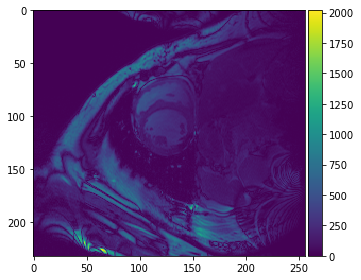

In [ ]:
image = nib.load(ff[2])
imag=image.get_fdata()
slice1 = imag[:,:,5]
io.imshow(slice1)

INTRODUCING NOISE WITH GAUSSAIN FILTER

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


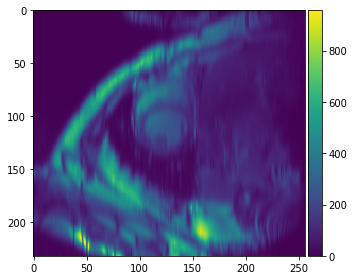

In [ ]:
from skimage.filters import gaussian
filtered_img = gaussian(slice1, sigma=4, multichannel=True)
io.imshow(filtered_img)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


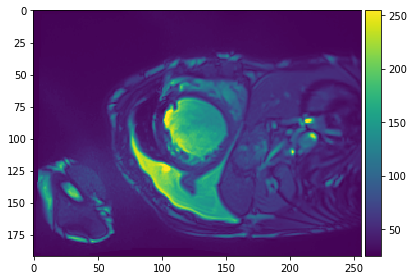

In [ ]:
image = nib.load(ff[0])
imag=image.get_fdata()
slice2 = imag[:,:,5]
io.imshow(slice2)

DATA AUGMENTATION

In [ ]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

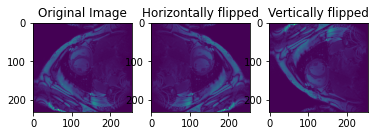

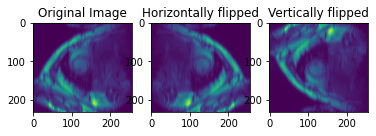

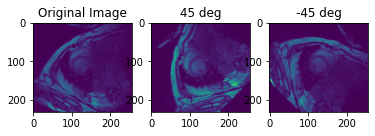

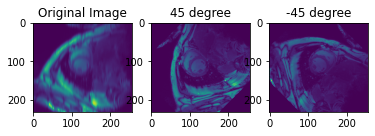

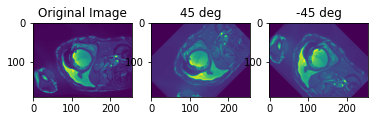

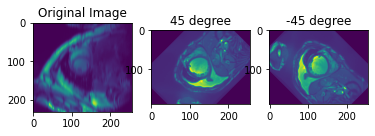

In [ ]:
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(slice1)

hflipped_image= np.fliplr(slice1) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(slice1) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(filtered_img)

hflipped_image= np.fliplr(filtered_img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(filtered_img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

r_image = rotate(slice1, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(slice1, angle=-45) #angle value is negative for clockwise rotation

plt.subplot(131)
plt.imshow(slice1)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 deg")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 deg")
plt.show()

plt.subplot(131)
plt.imshow(filtered_img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree")
plt.show()

r_image = rotate(slice2, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(slice2, angle=-45) #angle value is negative for clockwise rotation

plt.subplot(131)
plt.imshow(slice2)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 deg")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 deg")
plt.show()

plt.subplot(131)
plt.imshow(filtered_img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree")
plt.show()

READING THE IMAGES INTO A NUMPY ARRAY

In [ ]:
for f in range(len(ff)):
    a = nib.load(ff[f])
    a = a.get_fdata()
a=np.asarray(a)

In [ ]:
for f in range(len(ff1)):
    a1 = nib.load(ff1[f])
    a1 = a1.get_fdata()
a1=np.asarray(a1)

In [ ]:
for f in range(len(ff2)):
    a2 = nib.load(ff2[f])
    a2 = a2.get_fdata()
a2=np.asarray(a2)

In [ ]:
for f in range(len(ff3)):
    a3 = nib.load(ff3[f])
    a3 = a3.get_fdata()
a3=np.asarray(a3)

In [ ]:
print(a.shape)
print(a1.shape)
print(a2.shape)
print(a3.shape)

(216, 256, 9)
(200, 256, 10)
(216, 256, 9)
(208, 256, 8)


In [ ]:
#print("Dataset (images) shape: {shape}".format(shape=images.shape))

DATA PREPROCESSING (ACCORDING TO THE MODEL REQUIREMENTS)

In [ ]:
a = np.resize(a,(50,1,16,20,33))

In [ ]:
a1 = np.resize(a1,(50,1,16,20,33))

In [ ]:
a2 = np.resize(a2,(50,1,16,20,33))

In [ ]:
a3 = np.resize(a3,(50,1,16,20,33))

In [ ]:
a1=a1.reshape(88000,6)

In [ ]:
a3=a3.reshape(88000,6)

NORMALISED PLOT - HISTOGRAM

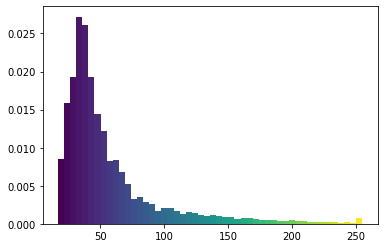

In [ ]:
import numpy as np
from matplotlib import cm

def normalize(imag):
    imag_min = np.min(imag)
    return (imag-imag_min)/(np.max(imag)-imag_min)

def show_histogram(values):
    n, bins, patches = plt.hist(values.reshape(-1), 50, density=True)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    for c, p in zip(normalize(bin_centers), patches):
        plt.setp(p, 'facecolor', cm.viridis(c))

    plt.show()
    
show_histogram(imag)

PLOTTING THE IMAGE IN 3 DIMENSIONAL SPACE CO-ORDINATES

In [ ]:
IMG_DIM = 50

from skimage.transform import resize
resized = resize(imag, (IMG_DIM, IMG_DIM, IMG_DIM), mode='constant')

In [ ]:
def explode(data):
    shape_arr = np.array(data.shape)
    size = shape_arr[:3]*2 - 1
    exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
    exploded[::2, ::2, ::2] = data
    return exploded

def expand_coordinates(indices):
    x, y, z = indices
    x[1::2, :, :] += 1
    y[:, 1::2, :] += 1
    z[:, :, 1::2] += 1
    return x, y, z

def plot_cube(cube, angle=320):
    cube = normalize(cube)
    
    facecolors = cm.viridis(cube)
    facecolors[:,:,:,-1] = cube
    facecolors = explode(facecolors)
    
    filled = facecolors[:,:,:,-1] != 0
    x, y, z = expand_coordinates(np.indices(np.array(filled.shape) + 1))

    fig = plt.figure(figsize=(30/2.54, 30/2.54))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)
    ax.set_xlim(right=IMG_DIM*2)
    ax.set_ylim(top=IMG_DIM*2)
    ax.set_zlim(top=IMG_DIM*2)
    
    ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)
    plt.show()

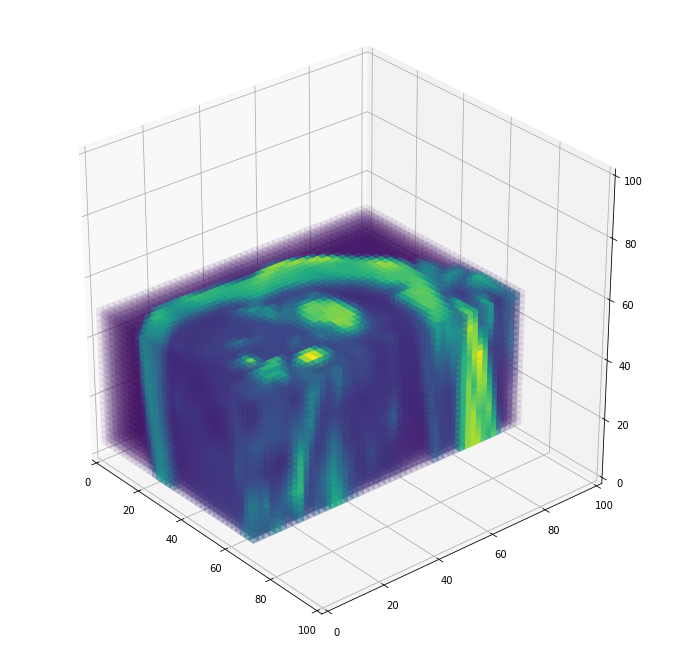

In [ ]:
image_3d = plot_cube(resized[:35,::-1,:25])
image_3d

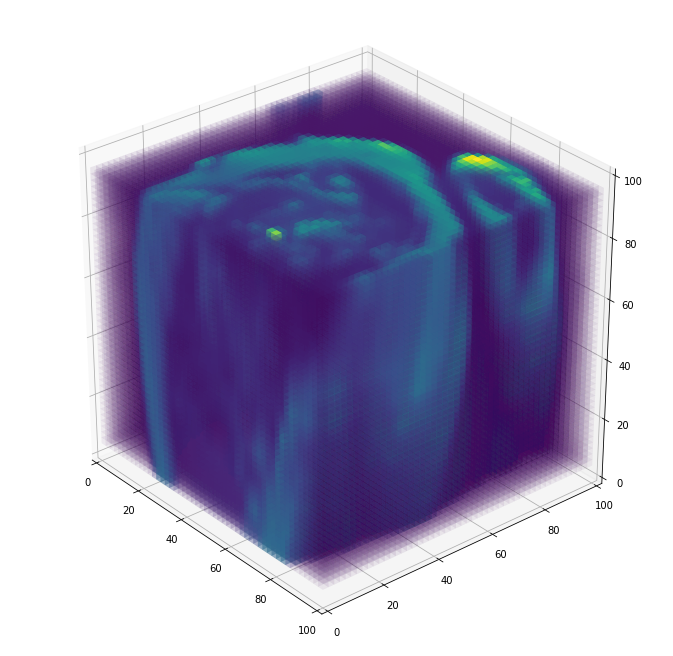

In [ ]:
plot_cube(resized[:,::-1,:])

In [ ]:
imag.shape

(208, 256, 10)

INTRODUCING NOISE TO THE ENTIRE TRAIN SET

In [ ]:
#[a,b,c,d]= np.shape(a_shape)
import io
mean = 0
sigma = 0.03
gauss = np.random.normal(mean,sigma,(1,16,20,33))
noisy_images1 = a + gauss

In [ ]:
noisy_images2 = a2 + gauss

MODEL ARCHITECTURE

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 16, 20, 3 0                                            
__________________________________________________________________________________________________
zero_padding3d (ZeroPadding3D)  (None, 1, 18, 22, 35 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 16, 13, 17, 3 3472        zero_padding3d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 16, 13, 17, 3 120         conv3d[0][0]                     
______________________________________________________________________________________________

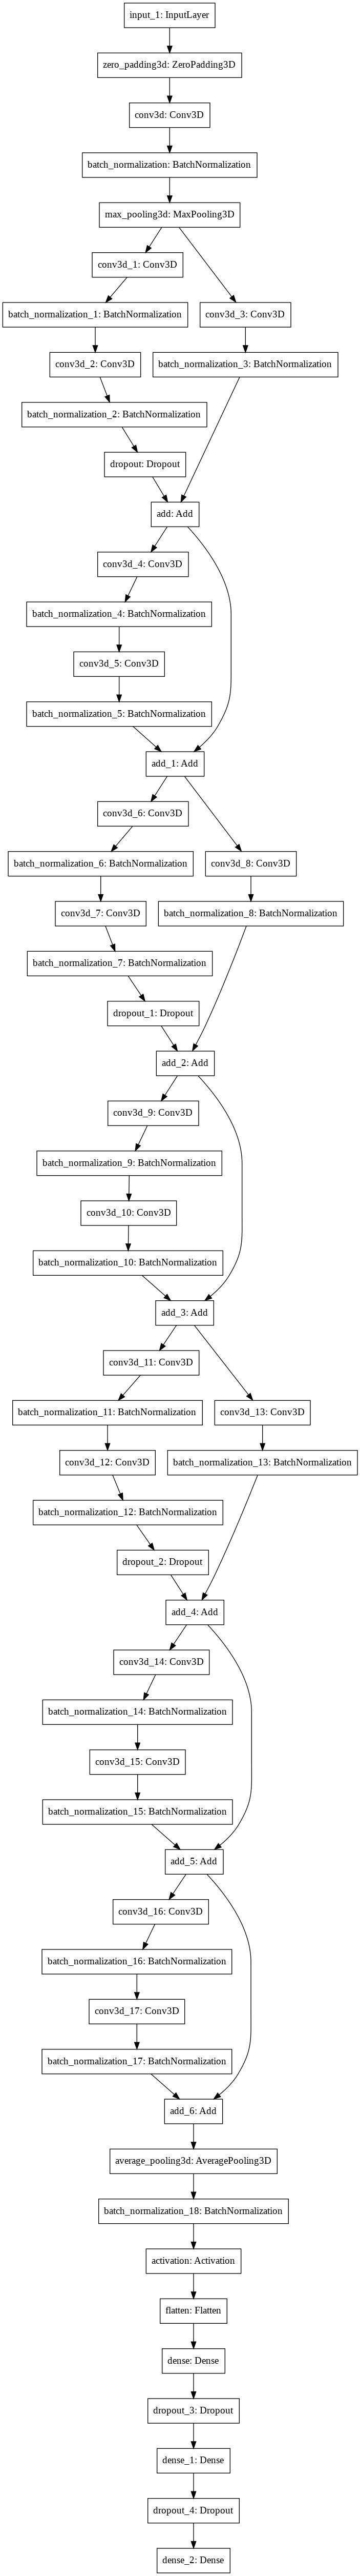

In [ ]:
from keras.models import Model
from keras.layers.convolutional import Conv3D, ZeroPadding3D
from keras.layers.convolutional import MaxPooling3D, AveragePooling3D
from keras.layers import Dropout, Input
from keras.layers import Flatten, add
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization  # batch Normalization for managing internal covariant shift.
from keras.layers import Activation
from tensorflow.keras.utils import plot_model


def Conv3d_BN(x, nb_filter, kernel_size, strides=1, padding='same', name=None):
    x = Conv3D(nb_filter, kernel_size, padding=padding, data_format='channels_first', strides=strides,
               activation='relu')(x)
    x = BatchNormalization()(x)
    return x


def identity_Block(inpt, nb_filter, kernel_size, strides=1, with_conv_shortcut=False):
    x = Conv3d_BN(inpt, nb_filter=nb_filter, kernel_size=kernel_size, strides=strides, padding='same')
    x = Conv3d_BN(x, nb_filter=nb_filter, kernel_size=kernel_size, padding='same')
    if with_conv_shortcut:
        shortcut = Conv3d_BN(inpt, nb_filter=nb_filter, strides=strides,
                             kernel_size=kernel_size)
        x = Dropout(0.2)(x)
        x = add([x, shortcut])
        return x
    else:
        x = add([x, inpt])
        return x


def bottlneck_Block(inpt, nb_filter, strides=1, with_conv_shortcut=False):
     k1, k2, k3 = nb_filter
     x = Conv3d_BN(inpt, nb_filter=k1, kernel_size=1, strides=strides, padding='same')
     x = Conv3d_BN(x, nb_filter=k2, kernel_size=3, padding='same')
     x = Conv3d_BN(x, nb_filter=k3, kernel_size=1, padding='same')
     if with_conv_shortcut:
         shortcut = Conv3D(inpt, nb_filter=k3, data_format='channels_first', strides=strides, kernel_size=1)
         x = add([x, shortcut])
         return x
     else:
         x = add([x, inpt])
         return x


def resnet(shape, classes):
    inpt = Input(shape=shape)
    x = ZeroPadding3D((1, 1, 1), data_format='channels_first')(inpt)

    # conv1
    x = Conv3d_BN(x, nb_filter=16, kernel_size=(6, 6, 6), strides=1, padding='valid')
    x = MaxPooling3D(pool_size=(3, 3, 3), strides=2, data_format='channels_first')(x)

    # conv2_x
    x = identity_Block(x, nb_filter=32, kernel_size=(2, 2, 2), strides=1, with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=32, kernel_size=(2, 2, 2))
    #x = identity_Block(x, nb_filter=64, kernel_size=(3, 3, 3))

    # conv3_x
    x = identity_Block(x, nb_filter=64, kernel_size=(2, 2, 2), strides=1, with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=64, kernel_size=(2, 2, 2))
    #x = identity_Block(x, nb_filter=128, kernel_size=(3, 3, 3))
    #x = identity_Block(x, nb_filter=128, kernel_size=(3, 3, 3))

      #conv4_x
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3), strides=2, with_conv_shortcut=True)
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3))
    x = identity_Block(x, nb_filter=256, kernel_size=(3, 3, 3))

    x = AveragePooling3D(pool_size=(2, 2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(classes, activation='relu')(x)

    model = Model(inputs=inpt, outputs=x)
    return model



from keras.optimizers import Adam
# loading train data and validation data
# train data with shape X (?, 1, 16, 20, 33) Y (?, 6)
X_data = noisy_images1
y_data = a1
# validation data shape same as train
X_data_2 = noisy_images2
y_data_2 = a3
model = resnet((1,16, 20,33), 3)
model.summary()
plot_model(model, to_file='resnet_2.jpg')




In [ ]:
a3.shape

(88000, 6)

In [ ]:
a1=np.resize(a1,(50,6))
a3=np.resize(a3,(50,6))


In [ ]:
epochs=10
learningRate=0.0001
decay=learningRate/epochs
adam=Adam(lr=learningRate,beta_1=0.9,beta_2=0.999,epsilon=1e-08,amsgrad=False,name="Adam")
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import EarlyStopping
import tensorflow as tf
# every 10 epochs save weights
checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5',monitor='val_acc',
                              verbose=1,save_best_only=False,save_weights_only=True,mode='auto',
                              period = 10)
#every epoch check validation accuracy scores and save the highest
checkpoint_2 = ModelCheckpoint('best.{epoch:02d}-{val_loss:.4f}-{val_acc:.4f}.hdf5',monitor='val_acc',
                              verbose=1,save_best_only=True,save_weights_only=True,mode='auto',
                              period = 1)

# use tensorboard can watch the change in time
tensorboard_ = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0,
                          embeddings_layer_names=None, embeddings_metadata=None)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#The training will stop if the validation loss does not decrease for 3 epochs.
history = model.fit(a,a1,validation_data=(a2,a3),verbose=1,batch_size=5,epochs=15)

In [ ]:
pred_noisy = model.predict(noisy_images2)

In [ ]:
a2=np.resize(a2,(50,3))

In [ ]:
 plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred_noisy[i, ..., 0], cmap='gray')  
plt.show()

Accuracy Metrics

PEAK SIGNAL TO NOISE RATIO

In [ ]:
import math
mse =  np.mean((a2 - pred_noisy) ** 2)
psnr = 20 * abs(math.log10( 1.0 / math.sqrt(mse)))
print("Peak Signal to Noise Ratio",psnr)

Peak Signal to Noise Ratio 27.923172719248207


In [ ]:
a=np.resize(a,(50,3))

In [ ]:
a1= np.resize(a1,(50,3))

STRUCTURAL SIMILARITY INDEX

In [ ]:
from skimage.metrics import structural_similarity
(score, diff) = structural_similarity(a1, pred_noisy, full=True,multichannel=True)
diff = (diff * 255).astype("uint8")
print("Structural Similarity Index: {}".format(score))

Structural Similarity Index: 0.33333458683681466


/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
